<a href="https://colab.research.google.com/github/haroldgo23/ph-fake-news-detection/blob/main/Model_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare dataset and models

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import re
import string

###Import csv files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Inserting fake and real dataset

In [3]:
df_eng = pd.read_csv("/content/drive/MyDrive/Machine Learning Tool for Identification of Philippine Fake News in Social Media/English.csv")
df_fil = pd.read_csv("/content/drive/MyDrive/Machine Learning Tool for Identification of Philippine Fake News in Social Media/Filipino.csv")

In [4]:
df_eng.head(5)

,Page,Text,Label
0,Manila Bulletin,President Ferdinand “Bongbong” Marcos Jr. beli...,0
1,Manila Bulletin,A New People’s Army member who has pending war...,0
2,Manila Bulletin,Malacañang announced that President Marcos has...,0
3,Manila Bulletin,Fisherfolk organizations staged a peaceful ral...,0
4,Manila Bulletin,Members of the Northern Police District-Distri...,0


In [5]:
df_fil.head(5)

,Page,Text,Label
0,Balita,Nagtalaga na ng bagong acting president at chi...,0
1,Balita,"Sa paglaganap ng text scam, nagbabala si Senad...",0
2,Balita,Umapela sa gobyerno ang grupong Confederation ...,0
3,Balita,Nagtatago pa rin umano si National Bilibid Pri...,0
4,Balita,Mahigpit ang kautusan ni Manila Mayor Honey La...,0


In [6]:
df_eng.shape, df_fil.shape

((1210, 3), (793, 3))

Merging the main fake and true dataframe

In [7]:
df_merge = pd.concat([df_eng, df_fil], axis =0 )
df_merge.head(10)

,Page,Text,Label
0,Manila Bulletin,President Ferdinand “Bongbong” Marcos Jr. beli...,0
1,Manila Bulletin,A New People’s Army member who has pending war...,0
2,Manila Bulletin,Malacañang announced that President Marcos has...,0
3,Manila Bulletin,Fisherfolk organizations staged a peaceful ral...,0
4,Manila Bulletin,Members of the Northern Police District-Distri...,0
5,Manila Bulletin,Secretary of Foreign Affairs Enrique Manalo sa...,0
6,Manila Bulletin,"CAMP RAFAEL C. RODRIGUEZ, Butuan City – A top ...",0
7,Manila Bulletin,The National Bureau of Investigation (NBI) is ...,0
8,Manila Bulletin,At least six members of the New People’s Army ...,0
9,Manila Bulletin,The Department of Finance (DOF) has vowed to r...,0


In [8]:
df_merge.columns

Index(['Page', 'Text', 'Label'], dtype='object')

#### Dropping unnecessary columns columns 

In [9]:
df = df_merge.drop(["Page"], axis = 1)
df.head(10)

,Text,Label
0,President Ferdinand “Bongbong” Marcos Jr. beli...,0
1,A New People’s Army member who has pending war...,0
2,Malacañang announced that President Marcos has...,0
3,Fisherfolk organizations staged a peaceful ral...,0
4,Members of the Northern Police District-Distri...,0
5,Secretary of Foreign Affairs Enrique Manalo sa...,0
6,"CAMP RAFAEL C. RODRIGUEZ, Butuan City – A top ...",0
7,The National Bureau of Investigation (NBI) is ...,0
8,At least six members of the New People’s Army ...,0
9,The Department of Finance (DOF) has vowed to r...,0


In [10]:
df.isnull().sum()

Text     0
Label    0
dtype: int64

#### Randomly shuffling the dataframe 

In [11]:
df = df.sample(frac = 1)

In [12]:
df.head()

,Text,Label
729,This Miyako character is infinitely funny. She...,1
355,Senate Minority Leader Aquilino Pimentel III t...,0
763,Engaging the Propaganda rosas laban sa rosas M...,1
443,Pinangunahan ni Quezon City Mayor Joy Belmonte...,0
1154,Enough of all these bandwagon presidential can...,1


In [13]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [14]:
df.columns

Index(['Text', 'Label'], dtype='object')

In [15]:
df.head()

,Text,Label
0,This Miyako character is infinitely funny. She...,1
1,Senate Minority Leader Aquilino Pimentel III t...,0
2,Engaging the Propaganda rosas laban sa rosas M...,1
3,Pinangunahan ni Quezon City Mayor Joy Belmonte...,0
4,Enough of all these bandwagon presidential can...,1


#### Defining independent and dependent variables as x and y

In [16]:
x = df["Text"]
y = df["Label"]
#print(x)

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [17]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [18]:
df["Text"] = df["Text"].apply(wordopt)

#### Splitting the dataset into training set and testing set. 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Convert text to vectors

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorization = TfidfVectorizer()
X = vectorization.fit_transform(x)
xv_train = vectorization.transform(x_train)
xv_test = vectorization.transform(x_test)
#print(X)

### 1. Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
LR = LogisticRegression(solver='saga', penalty='l1', 
                        max_iter=1000, C=100)
LR.fit(xv_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=100, max_iter=1000, penalty='l1', solver='saga')

In [24]:
pred_lr=LR.predict(xv_test)

In [25]:
LR.score(xv_test, y_test)

0.972568578553616

In [26]:
# cross validation
from sklearn.model_selection import cross_val_score
score_lr = cross_val_score(LR, X, y,cv=10)
print(score_lr)
print(score_lr.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[0.97512438 0.99004975 0.960199   0.975      0.955      0.97
 0.97       0.975      0.99       0.97      ]
0.9730373134328358


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### 2. Decision Tree Classification

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
DT = DecisionTreeClassifier(min_samples_split=6,min_samples_leaf=2,
                            max_features=None, max_depth=None,
                            criterion='gini')
DT.fit(xv_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=6)

In [29]:
pred_dt = DT.predict(xv_test)

In [30]:
DT.score(xv_test, y_test)

0.8503740648379052

In [31]:
# cross validation
from sklearn.model_selection import cross_val_score
score_dt = cross_val_score(DT, X, y,cv=10)
print(score_dt)
print(score_dt.mean())

[0.90049751 0.90049751 0.88059701 0.845      0.89       0.905
 0.905      0.905      0.905      0.885     ]
0.8921592039800995


### 3. Gradient Boosting Classifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(subsample=0.5, n_estimators=1000, 
                                 max_depth=3, learning_rate=0.02) 

In [33]:
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, subsample=0.5)

In [34]:
pred_gbc = GBC.predict(xv_test)

In [35]:
GBC.score(xv_test, y_test)

0.9576059850374065

In [36]:
# cross validation
from sklearn.model_selection import cross_val_score
score_gbc = cross_val_score(GBC, X, y,cv=10)
print(score_gbc)
print(score_gbc.mean())

[0.9800995 0.9800995 0.9800995 0.965     0.955     0.97      0.965
 0.98      0.99      0.96     ]
0.9725298507462685


### 4. Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50, min_samples_split=6,
                             min_samples_leaf=2,max_features='sqrt',
                             max_depth=None, criterion='entropy')

In [38]:
RFC.fit(xv_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=6,
                       n_estimators=50)

In [39]:
pred_rfc = RFC.predict(xv_test)

In [40]:
RFC.score(xv_test, y_test)

0.9576059850374065

In [41]:
# cross validation
from sklearn.model_selection import cross_val_score
score_rfc = cross_val_score(RFC, X, y,cv=10)
print(score_rfc)
print(score_rfc.mean())

[0.95024876 0.97014925 0.9800995  0.96       0.95       0.96
 0.97       0.945      0.98       0.955     ]
0.9620497512437811


### 5. Passive-Aggresive Classifier

In [42]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=500, 
                                  C=100) # prev best @ max iter = 50

In [43]:
pac.fit(xv_train, y_train)

PassiveAggressiveClassifier(C=100, max_iter=500)

In [44]:
pred_pac = pac.predict(xv_test)

In [45]:
pac.score(xv_test, y_test)

0.9825436408977556

In [46]:
# cross validation
from sklearn.model_selection import cross_val_score
score_pac = cross_val_score(pac, X, y,cv=10)
print(score_pac)
print(score_pac.mean())

[0.96517413 0.98507463 0.97512438 0.975      0.965      0.98
 0.965      0.97       0.985      0.975     ]
0.9740373134328358


### 6. Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB(alpha=1.0e-10) #no smoothing

In [48]:
mnb.fit(xv_train, y_train)

MultinomialNB(alpha=1e-10)

In [49]:
pred_mnb = mnb.predict(xv_test)

In [50]:
mnb.score(xv_test, y_test)

0.9451371571072319

In [51]:
# cross validation
from sklearn.model_selection import cross_val_score
score_nb = cross_val_score(mnb, X, y,cv=10)
print(score_nb)
print(score_nb.mean())

[0.94527363 0.94527363 0.96517413 0.94       0.975      0.96
 0.945      0.93       0.955      0.93      ]
0.9490721393034824


### 7. Support Vector Machine

In [52]:
from sklearn import svm
svm = svm.SVC(kernel='linear', degree=0.001, 
              C=10, probability=True) # best @ kernel='linear', prob=True

In [53]:
svm.fit(xv_train, y_train)

SVC(C=10, degree=0.001, kernel='linear', probability=True)

In [54]:
pred_svm = svm.predict(xv_test)

In [55]:
svm.score(xv_test, y_test)

0.9850374064837906

In [56]:
# cross validation
from sklearn.model_selection import cross_val_score
score_svm = cross_val_score(svm, X, y,cv=10)
print(score_svm)
print(score_svm.mean())

[0.97014925 0.98507463 0.97512438 0.975      0.965      0.98
 0.97       0.975      0.985      0.975     ]
0.9755348258706468


In [57]:
# if ever conf matrix is needed in the future for performance metrics
""" 
print(classification_report(y_test, pred_svm))
cm_svm = confusion_matrix(y_test, pred_svm)
print(cm_svm)

cmd_svm = ConfusionMatrixDisplay(cm_svm, display_labels=['Not Fake','Fake']) # 0 - not fake, 1 - fake
cmd_svm.plot()  

labels = ['Not Fake','Fake']
fig_svm, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_svm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        ax.text(x=j, y=i,s=cm_svm[i, j], va='center', ha='center', size='large')
 
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix of Support Vector Machine', fontsize=12)
plt.show()

fig_svm.savefig('conf_svm.pdf', format='pdf', bbox_inches = 'tight')
""" 

" \nprint(classification_report(y_test, pred_svm))\ncm_svm = confusion_matrix(y_test, pred_svm)\nprint(cm_svm)\n\ncmd_svm = ConfusionMatrixDisplay(cm_svm, display_labels=['Not Fake','Fake']) # 0 - not fake, 1 - fake\ncmd_svm.plot()  \n\nlabels = ['Not Fake','Fake']\nfig_svm, ax = plt.subplots(figsize=(5, 5))\nax.matshow(cm_svm, cmap=plt.cm.Blues, alpha=0.3)\nfor i in range(cm_svm.shape[0]):\n    for j in range(cm_svm.shape[1]):\n        ax.text(x=j, y=i,s=cm_svm[i, j], va='center', ha='center', size='large')\n \nax.set_xticklabels([''] + labels)\nax.set_yticklabels([''] + labels)\nplt.xlabel('Predicted Label', fontsize=12)\nplt.ylabel('True Label', fontsize=12)\nplt.title('Confusion Matrix of Support Vector Machine', fontsize=12)\nplt.show()\n\nfig_svm.savefig('conf_svm.pdf', format='pdf', bbox_inches = 'tight')\n"

# Evaluation 

### ROC/AUC

In [58]:
# getting probabilities for the positive outcome
lr_probs = LR.predict_proba(xv_test)[:, 1]
dt_probs = DT.predict_proba(xv_test)[:, 1]
gb_probs = GBC.predict_proba(xv_test)[:, 1]
rf_probs = RFC.predict_proba(xv_test)[:, 1]
pac_probs = pac.decision_function(xv_test)
nb_probs = mnb.predict_proba(xv_test)[:, 1]
svm_probs = svm.predict_proba(xv_test)[:, 1]

In [ ]:
#lr_probs = lr_probs[:, 1]
#dt_probs = dt_probs[:, 1]
#gb_probs = gb_probs[:, 1]
#rf_probs = rf_probs[:, 1]
##pac_probs = pac_probs[:, 1]
#nb_probs = nb_probs[:, 1]
#svm_probs = svm_probs[:, 1]

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
lr_auc = roc_auc_score(y_test, lr_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
pac_auc = roc_auc_score(y_test, pac_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

In [61]:
print('LR: AUC = %.3f' % (lr_auc))
print('DTC: AUC = %.3f' % (dt_auc))
print('GBC: AUC = %.3f' % (gb_auc))
print('RF: AUC = %.3f' % (rf_auc))
print('PAC: AUC = %.3f' % (pac_auc))
print('NB: AUC = %.3f' % (nb_auc))
print('SVM: AUC = %.3f' % (svm_auc))

LR: AUC = 0.995
DTC: AUC = 0.866
GBC: AUC = 0.993
RF: AUC = 0.990
PAC: AUC = 0.997
NB: AUC = 0.988
SVM: AUC = 0.998


In [62]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
pac_fpr, pac_tpr, _ = roc_curve(y_test, pac_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

#### Plot the curves

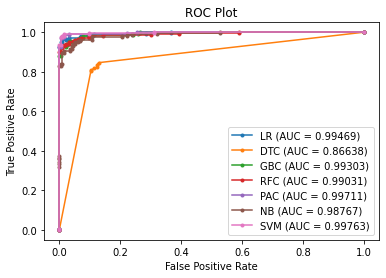

In [72]:
roc_plot = plt.figure()
plt.plot(lr_fpr, lr_tpr, marker='.', label='LR (AUC = %0.5f)' % lr_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DTC (AUC = %0.5f)' % dt_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='GBC (AUC = %0.5f)' % gb_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RFC (AUC = %0.5f)' % rf_auc)
plt.plot(pac_fpr, pac_tpr, marker='.', label='PAC (AUC = %0.5f)' % pac_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='NB (AUC = %0.5f)' % nb_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUC = %0.5f)' % svm_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend()  
# Show plot
plt.show()

roc_plot.savefig('roc.pdf', format='pdf', bbox_inches = 'tight')

### Precision, Recall, F1-scores

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score
lr_prec = precision_score(y_test, pred_lr)
lr_rec = recall_score(y_test, pred_lr)
lr_f1 = f1_score(y_test, pred_lr)
print("LR Precision:", lr_prec)
print("LR Recall:", lr_rec)
print("LR F1-score", lr_f1)

LR Precision: 0.9804878048780488
LR Recall: 0.9663461538461539
LR F1-score 0.9733656174334141


In [65]:
dtc_prec = precision_score(y_test, pred_dt)
dtc_rec = recall_score(y_test, pred_dt)
dtc_f1 = f1_score(y_test, pred_dt)
print("DTC Precision:", dtc_prec)
print("DTC Recall:", dtc_rec)
print("DTC F1-score", dtc_f1)

DTC Precision: 0.8936170212765957
DTC Recall: 0.8076923076923077
DTC F1-score 0.8484848484848485


In [67]:
gbc_prec = precision_score(y_test, pred_gbc)
gbc_rec = recall_score(y_test, pred_gbc)
gbc_f1 = f1_score(y_test, pred_gbc)
print("GBC Precision:", gbc_prec)
print("GBC Recall:", gbc_rec)
print("GBC F1-score", gbc_f1)

GBC Precision: 0.9751243781094527
GBC Recall: 0.9423076923076923
GBC F1-score 0.9584352078239609


In [68]:
rfc_prec = precision_score(y_test, pred_rfc)
rfc_rec = recall_score(y_test, pred_rfc)
rfc_f1 = f1_score(y_test, pred_rfc)
print("RFC Precision:", rfc_prec)
print("RFC Recall:", rfc_rec)
print("RFC F1-score", rfc_f1)

RFC Precision: 0.9798994974874372
RFC Recall: 0.9375
RFC F1-score 0.9582309582309583


In [69]:
pac_prec = precision_score(y_test, pred_pac)
pac_rec = recall_score(y_test, pred_pac)
pac_f1 = f1_score(y_test, pred_pac)
print("PAC Precision:", pac_prec)
print("PAC Recall:", pac_rec)
print("PAC F1-score", pac_f1)

PAC Precision: 0.9950738916256158
PAC Recall: 0.9711538461538461
PAC F1-score 0.9829683698296837


In [70]:
nb_prec = precision_score(y_test, pred_mnb)
nb_rec = recall_score(y_test, pred_mnb)
nb_f1 = f1_score(y_test, pred_mnb)
print("NB Precision:", nb_prec)
print("NB Recall:", nb_rec)
print("NB F1-score", nb_f1)

NB Precision: 0.9558823529411765
NB Recall: 0.9375
NB F1-score 0.9466019417475728


In [71]:
svm_prec = precision_score(y_test, pred_svm)
svm_rec = recall_score(y_test, pred_svm)
svm_f1 = f1_score(y_test, pred_svm)
print("SVM Precision:", svm_prec)
print("SVM Recall:", svm_rec)
print("SVM F1-score", svm_f1)

SVM Precision: 0.9950980392156863
SVM Recall: 0.9759615384615384
SVM F1-score 0.9854368932038836


# Model Testing With Manual Entry

### News

In [ ]:
def output_lable(n):
    if n == 0:
        return "not Fake news"
    elif n == 1:
        return "Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_pac = pac.predict(new_xv_test)
    pred_mnb = mnb.predict(new_xv_test)
    pred_svm = svm.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nPAC Prediction: {} \nMNB Prediction: {} \nSVM Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                                                                                            output_lable(pred_DT[0]), 
                                                                                                                                                                            output_lable(pred_GBC[0]), 
                                                                                                                                                                            output_lable(pred_RFC[0]),
                                                                                                                                                                            output_lable(pred_pac[0]),
                                                                                                                                                                            output_lable(pred_mnb[0]),
                                                                                                                                                                            output_lable(pred_svm[0])))

In [ ]:
news = str(input())
manual_testing(news)

President ferdinand "bongbong" marcos jr.  in monday the signed sim card registration the action, first legislation enacted under he is administration.  The law aims to curb text scams and spam.       powered by adsparc the ceremonial signing were hold on malacañang taking senate president juan miguel zubiri, place speaker martin romualdez and other stakeholders standing to witnesses.    "i the commend legislators the originate place and the originate senate of coming upon taking that timely and necessary law.  It the is first legislative measured this successfully the pass approval the for bicameral panel for both houses the on 19th the congress," chief executive say, adding this such that law "has long achieved overdue. "  the "truly, legislation is moving to be welcome by prolific for our people, especially currently taking reports the for commission for various crimes using mobile phones, including proliferation for text scams and spam.  Indeed, the taking signing for that law, our